![](https://i.imgur.com/JsMvGnP.png)

## Projeto - Classificação

## Considerações iniciais

Neste notebook vamos praticar a construção de um modelo de Machine Learning. Mais especificamente, iremos utilizar um algoritmo para realizar um processo de classificação. Propositalmente, evitaremos adentrar em algoritmos e explicações mais complexas, pois o foco é percorrer o fluxo do Aprendizado de Máquina por inteiro, ou o máximo dele.

###  O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes de um serviço que interrompe suas assinaturas dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

###  Descrição do dados

No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

##  Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

### Importações

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


churn = pd.read_csv('Churn_Modelling.csv')

churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


###  Análise exploratória

In [10]:
pd.isna(churn).sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


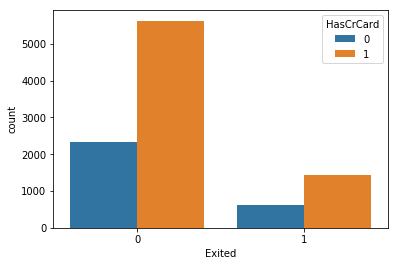

In [12]:
import seaborn as sns

sns.countplot(x='Exited', data=churn, hue='HasCrCard')

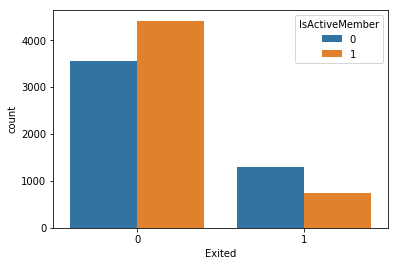

In [10]:
sns.countplot(x='Exited', data=churn, hue='IsActiveMember')

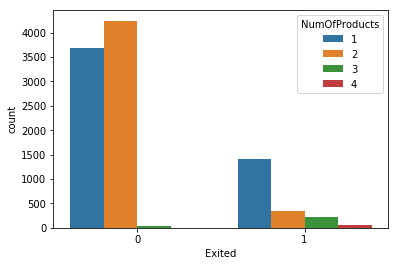

In [11]:
sns.countplot(x='Exited', data=churn, hue='NumOfProducts')

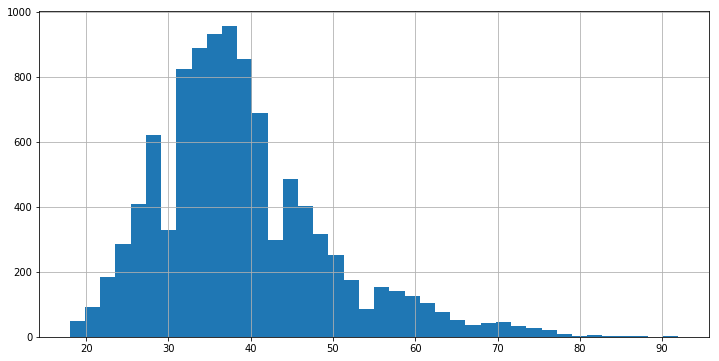

In [41]:
churn['Age'].hist(grid=True, bins=40, figsize=(12,6))

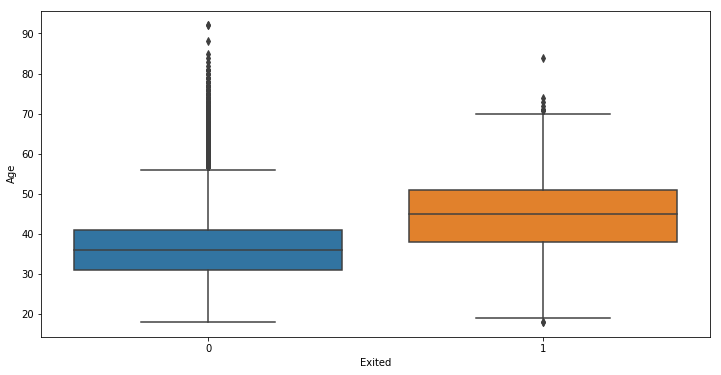

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Exited', y='Age', data=churn)

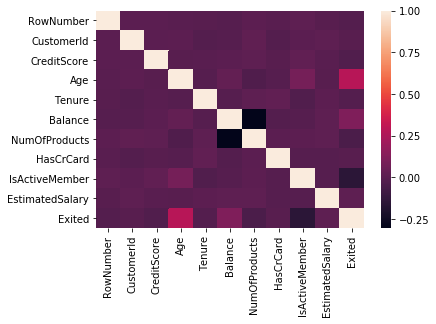

In [46]:
corr = churn.corr()

sns.heatmap(corr)

###  Preparação e limpeza dos dados

In [7]:
gender = pd.get_dummies(churn['Gender'], drop_first=True)

In [8]:
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
churn.drop(['Gender', 'RowNumber', 'CustomerId', 'Surname', 'Geography'], axis=1, inplace=True)
churn = pd.concat([gender, churn], axis=1)
churn.head()

,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,608,41,1,83807.86,1,0,1,112542.58,0
2,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,850,43,2,125510.82,1,1,1,79084.10,0


###  Seleção de atributos

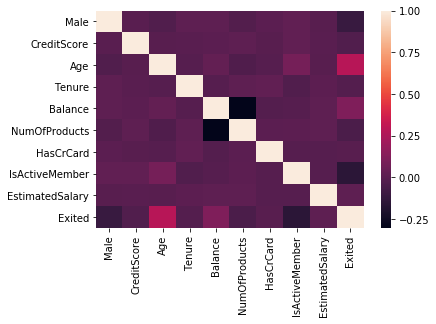

In [72]:
corr = churn.corr()

sns.heatmap(corr) 

In [10]:
#x = churn[['Male', 'IsActiveMember', 'Balance', 'Age']]
y = churn['Exited']
x = churn.drop('Exited', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

###  Construção do modelo

#### Regressão Logística

In [74]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### KNN

In [28]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### SVM

In [30]:
svm = svm.SVC()
svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Árvore de Decisão

In [32]:
td = DecisionTreeClassifier(random_state=0)
td.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

#### Random Forest

In [76]:
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

#### Naive Bayes 

In [37]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB(priors=None)

###  Avaliação do modelo

#### Regressão Logística

In [77]:
score = logmodel.score(x_test, y_test)
cross_val = np.mean(cross_val_score(logmodel, x_train, y_train, scoring='accuracy', cv=5))
prediction = logmodel.predict(x_test)
auc = roc_auc_score(y_test, prediction)

print(f'A acurácia é de {score} e pela validação cruzada foi de {cross_val}')
print(f'O valor da métrica AUC é {auc}')

A acurácia é de 0.787 e pela validação cruzada foi de 0.7907514184087572
O valor da métrica AUC é 0.5192073996671698


#### KNN

In [29]:
score = knn.score(x_test, y_test)
cross_val = np.mean(cross_val_score(knn, x_train, y_train, scoring='accuracy', cv=5))
prediction = knn.predict(x_test)
auc = roc_auc_score(y_test, prediction)

print(f'A acurácia é de {score} e pela validação cruzada foi de {cross_val}')
print(f'O valor da métrica AUC é {auc}')

A acurácia é de 0.7645 e pela validação cruzada foi de 0.7572522674813545
O valor da métrica AUC é 0.5216804055884515


#### SVM

In [31]:
score = svm.score(x_test, y_test)
cross_val = np.mean(cross_val_score(svm, x_train, y_train, scoring='accuracy', cv=5))
prediction = svm.predict(x_test)
auc = roc_auc_score(y_test, prediction)

print(f'A acurácia é de {score} e pela validação cruzada foi de {cross_val}')
print(f'O valor da métrica AUC é {auc}')

A acurácia é de 0.7975 e pela validação cruzada foi de 0.7960000924805047
O valor da métrica AUC é 0.5


#### Árvore de Decisão

In [33]:
score = td.score(x_test, y_test)
cross_val = np.mean(cross_val_score(td, x_train, y_train, scoring='accuracy', cv=5))
prediction = td.predict(x_test)
auc = roc_auc_score(y_test, prediction)

print(f'A acurácia é de {score} e pela validação cruzada foi de {cross_val}')
print(f'O valor da métrica AUC é {auc}')

A acurácia é de 0.79 e pela validação cruzada foi de 0.7738755532228725
O valor da métrica AUC é 0.6878052556213475


#### Random Forest

In [78]:
score = rf.score(x_test, y_test)
cross_val = np.mean(cross_val_score(rf, x_train, y_train, scoring='accuracy', cv=5))
prediction = rf.predict(x_test)
auc = roc_auc_score(y_test, prediction)

print(f'A acurácia é de {score} e pela validação cruzada foi de {cross_val}')
print(f'O valor da métrica AUC é {auc}')

A acurácia é de 0.854 e pela validação cruzada foi de 0.8373733865228072
O valor da métrica AUC é 0.7085877936452648


#### Naive Bayes 

In [38]:
score = gnb.score(x_test, y_test)
cross_val = np.mean(cross_val_score(gnb, x_train, y_train, scoring='accuracy', cv=5))
prediction = gnb.predict(x_test)
auc = roc_auc_score(y_test, prediction)

print(f'A acurácia é de {score} e pela validação cruzada foi de {cross_val}')
print(f'O valor da métrica AUC é {auc}')

A acurácia é de 0.783 e pela validação cruzada foi de 0.7851260257816507
O valor da métrica AUC é 0.5213050040636248


###  Otimização do modelo

#### GridSearch para Parâmetros de Random Forest 

In [39]:
rf = RandomForestClassifier(random_state=0)

param_grid = {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 8]}


grid_search = GridSearchCV(rf, param_grid, scoring='accuracy', return_train_score=True)

In [40]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [3, 10, 30], 'max_features': [2, 4, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [41]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [42]:
grid_search.best_score_

0.85

#### Escalando os Dados

##### Standard Scaler

In [11]:
scaler = StandardScaler()
scaler.fit(x_train)

treino = scaler.transform(x_train)
novo_churn_treino = pd.DataFrame(treino, columns=x_train.columns)
novo_churn_treino.head()

,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-1.091687,0.169582,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432
1,0.916013,-2.304559,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664
2,-1.091687,-1.191196,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335
3,0.916013,0.035566,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528
4,-1.091687,2.056114,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378


In [12]:
test = scaler.transform(x_test)
novo_churn_test = pd.DataFrame(test, columns=x_test.columns)
novo_churn_test.head()

,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-1.091687,-0.552043,-0.368904,1.044737,0.879303,-0.921591,0.642595,0.968738,1.610857
1,-1.091687,-1.314903,0.109617,-1.031415,0.429722,-0.921591,0.642595,-1.032270,0.495870
2,-1.091687,0.571630,0.301026,1.044737,0.308583,-0.921591,0.642595,0.968738,-0.424787
3,0.916013,1.416961,-0.656016,-0.339364,0.575336,-0.921591,-1.556190,-1.032270,-0.187777
4,0.916013,0.571630,-0.081791,0.006661,1.389611,0.809503,0.642595,0.968738,0.616842


In [57]:
rf = RandomForestClassifier(random_state=0)
rf.fit(novo_churn_treino, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [58]:
score = rf.score(novo_churn_test, y_test)
cross_val = np.mean(cross_val_score(rf, novo_churn_treino, y_train, scoring='accuracy', cv=5))
prediction = rf.predict(novo_churn_test)
auc = roc_auc_score(y_test, prediction)

print(f'A acurácia é de {score} e pela validação cruzada foi de {cross_val}')
print(f'O valor da métrica AUC é {auc}')

A acurácia é de 0.853 e pela validação cruzada foi de 0.8372485427728682
O valor da métrica AUC é 0.7079608343976159


##### Min Max Scaler

In [13]:
scaler = MinMaxScaler()

scaler.fit(x_train)

treino = scaler.transform(x_train)
novo_churn_treino = pd.DataFrame(treino, columns=x_train.columns)
novo_churn_treino.head()

,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0,0.634,0.228571,0.5,0.000000,0.333333,1.0,0.0,0.819174
1,1.0,0.154,0.342857,0.1,0.317473,0.000000,1.0,1.0,0.285459
2,0.0,0.370,0.157143,0.2,0.471364,0.000000,1.0,0.0,0.928185
3,1.0,0.608,0.314286,0.5,0.443327,0.000000,1.0,0.0,0.868110
4,0.0,1.000,0.557143,0.8,0.531808,0.333333,1.0,1.0,0.661498


In [14]:
test = scaler.transform(x_test)
novo_churn_test = pd.DataFrame(test, columns=x_test.columns)
novo_churn_test.head()

,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0,0.494,0.242857,0.8,0.549949,0.000000,1.0,1.0,0.964298
1,0.0,0.346,0.314286,0.2,0.431933,0.000000,1.0,0.0,0.643514
2,0.0,0.712,0.342857,0.8,0.400133,0.000000,1.0,1.0,0.378640
3,1.0,0.876,0.200000,0.4,0.470157,0.000000,0.0,0.0,0.446828
4,1.0,0.712,0.285714,0.5,0.683907,0.333333,1.0,1.0,0.678318


In [54]:
score = rf.score(novo_churn_test, y_test)
cross_val = np.mean(cross_val_score(rf, novo_churn_treino, y_train, scoring='accuracy', cv=5))
prediction = rf.predict(novo_churn_test)
auc = roc_auc_score(y_test, prediction)

print(f'A acurácia é de {score} e pela validação cruzada foi de {cross_val}')
print(f'O valor da métrica AUC é {auc}')

A acurácia é de 0.854 e pela validação cruzada foi de 0.8372483083489486
O valor da métrica AUC é 0.7085877936452648


## Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. Você pode remover variáveis/atributos menos importantes, normalizar variáveis importantes, escolher outros algoritmos de aprendizagem supervisionada, etc. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.